<a href="https://colab.research.google.com/github/mfathul21/food-recomendations/blob/main/Proyek_Akhir_Food_Recomendations_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Recomendations System

## Project Overview

Dalam industri makanan yang terus berkembang pesat, baik restoran maupun layanan pengiriman makanan, semakin banyaknya variasi menu yang ditawarkan dapat menjadi dilema bagi pelanggan. Keputusan tentang apa yang akan dipesan seringkali memakan waktu dan dapat menjadi pengalaman yang kurang memuaskan jika tidak sesuai dengan preferensi atau keinginan pelanggan. Situasi ini menciptakan kesempatan untuk mengimplementasikan sistem rekomendasi makanan yang dapat memberikan rekomendasi yang dipersonalisasi dan sesuai dengan selera masing-masing pelanggan.

Sistem rekomendasi makanan bertujuan untuk memperbaiki pengalaman pelanggan dengan menyediakan rekomendasi menu yang cocok berdasarkan preferensi makanan sebelumnya, rating yang diberikan, atau bahkan preferensi makanan yang diungkapkan secara eksplisit [1]. Dengan memanfaatkan teknik-teknik seperti analisis data, machine learning, dan pemrosesan bahasa alami, sistem ini dapat menghasilkan rekomendasi yang lebih akurat dan relevan dari waktu ke waktu.

Selain meningkatkan kepuasan pelanggan, implementasi sistem rekomendasi makanan juga dapat membantu pemilik usaha makanan untuk meningkatkan penjualan dengan mengarahkan pelanggan kepada menu-menu yang lebih mungkin mereka sukai. Dengan memanfaatkan teknologi ini, diharapkan dapat menciptakan pengalaman makan yang lebih menyenangkan, meningkatkan loyalitas pelanggan, dan pada akhirnya memperkuat posisi kompetitif dalam industri makanan yang kompetitif ini.

## Business Understanding

**Problem Statements**

Berdasarkan kondisi yang telah diuraikan sebelumnya, perusahaan akan mengembangkan sebuah sistem rekomendasi makanan untuk pelanggan secara terpersonalisasi, untuk menjawab permasalahan berikut.

- Berdasarkan data pelanggan, bagaimana membuat sistem rekomendasi yang dipersonalisasi dengan teknik content-based filtering?
- Dengan data rating yang Anda miliki, bagaimana restoran dapat merekomendasikan makanan lain yang mungkin disukai dan belum pernah dipesan oleh pelanggan?

**Goals**

Untuk menjawab pertanyaan tersebut, buatlah sistem rekomendasi dengan tujuan atau goals sebagai berikut:

- Menghasilkan sejumlah rekomendasi makanan yang dipersonalisasi untuk pelanggan dengan teknik content-based filtering.
- Menghasilkan sejumlah rekomendasi makanan yang sesuai dengan preferensi pelanggan dan belum pernah dikunjungi sebelumnya dengan teknik collaborative filtering.

**Solution Statement**

Untuk mencapai tujuan tersebut, langkah-langkah berikut akan diambil:

1. Data Understanding
Data Understanding adalah tahap awal proyek untuk memahami data yang dimiliki. Dalam kasus ini, kita memiliki 9 file terpisah mengenai restoran, konsumen, dan rating.


2. Univariate Exploratory Data Analysis
Pada tahap ini, Anda melakukan analisis dan eksplorasi setiap variabel pada data. Jika dibutuhkan, Anda dapat melakukan eksplorasi lebih lanjut mengenai keterkaitan antara satu variabel dengan variabel lainnya.


3. Data Preparation
Pada tahap ini, Anda mempersiapkan data dan melakukan beberapa teknik seperti mengatasi missing value dan menyamakan jenis masakan. Pada sistem rekomendasi berbasis konten (content-based filtering) yang akan Anda kembangkan, satu restoran mewakili satu kategori masakan. Oleh karena itu, Anda perlu mengecek ulang dan memastikan setiap restoran memiliki satu kategori masakan.


4. Model Development dengan Content Based Filtering
Pada tahap inilah Anda mengembangkan sistem rekomendasi dengan teknik content based filtering. Ingatlah, teknik content based filtering akan merekomendasikan item yang mirip dengan item yang disukai pengguna di masa lalu. Pada tahap ini, Anda akan menemukan representasi fitur penting dari setiap kategori masakan dengan tfidf vectorizer dan menghitung tingkat kesamaan dengan cosine similarity. Setelah itu, Anda akan membuat sejumlah rekomendasi restoran untuk pelanggan berdasarkan kesamaan yang telah dihitung sebelumnya.


5. Model Development dengan Collaborative Filtering
Pada tahap ini, sistem merekomendasikan sejumlah restoran berdasarkan rating yang telah diberikan sebelumnya. Dari data rating pengguna, kita akan mengidentifikasi restoran-restoran yang mirip dan belum pernah dikunjungi oleh pengguna untuk direkomendasikan.

## Data Understanding

Data yang digunakan pada proyek kali ini adalah "Food Recomendation System" yang diunduh dari <a href="https://www.kaggle.com/datasets/schemersays/food-recommendation-system">Kaggle API</a>. Dataset ini merepresentasikan data yang berhubungan dengan sistem rekomendasi makanan. Dua dataset disertakan dalam file dataset ini. Pertama, termasuk dataset yang terkait dengan makanan, bahan, masakan yang terlibat. Kedua, termasuk dataset dari sistem rating untuk sistem rekomendasi.

Dataset pertama memiliki 400 baris dengan 5 fitur, yang terdiri fitur non-numerik seperti Name, C_Type, Veg_Non, dan Describe, serta fitur numerik yaitu Food_ID. Sedangkan, untuk dataset kedua memilki 512 baris data dengan 3 fitur numerik, yaitu User_ID, Food_ID, dan Rating.

## Data Loading

### Upload Datasets from Kaggle API

In [1]:
!pip install kaggle -q

In [ ]:
from google.colab import files
files.upload()

In [3]:
import json
import os

if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

In [4]:
!kaggle datasets download -d schemersays/food-recommendation-system

  0% 0.00/24.8k [00:00<?, ?B/s]
100% 24.8k/24.8k [00:00<00:00, 29.0MB/s]


In [5]:
!unzip food-recommendation-system.zip

Archive:  food-recommendation-system.zip
  inflating: 1662574418893344.csv    
  inflating: ratings.csv             


### Import Library and Datasets

In [76]:
import numpy as np
import tensorflow as tf
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [131]:
foods = pd.read_csv('1662574418893344.csv')
ratings = pd.read_csv('ratings.csv')

print(f"shape of foods: {foods.shape}")
print(f"shape of ratings: {ratings.shape}")

shape of foods: (400, 5)
shape of ratings: (512, 3)


## Univariate Exploratory Data Analysis

**Foods Datasets**

In [78]:
foods.sample(5)

,Food_ID,Name,C_Type,Veg_Non,Describe
147,148,curry fish fingers,Thai,non-veg,"river sole fish (cut in thin strips), garlic p..."
306,307,bhurji- egg,Indian,non-veg,"made using indian spices, onion, tomatoes, gre..."
355,356,Black-Bean Burgers,Chinese,veg,"cumin, black bean, cilantro, lettuce,sour crea..."
386,387,Pico de Gallo,Mexican,veg,"onion,tomatoes, oil, cilantro, jalapeao"
184,185,red wine braised mushroom flatbread,Italian,veg,"olive oil, fresh buffalo mozzarella cheese, ca..."


In [79]:
foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


Perhatikan, untuk semua fitur pada foods tidak memiliki nilai null dengan ditunjukkan dari Non-Null Count yaitu 400 yang sama dengan jumlah entries pada dataset tersebut. Selain itu, tipe data untuk setiap fitur juga telah sesuai.

In [80]:
foods.describe()

,Food_ID
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


Perhatikan, untuk fitur Food_ID pada foods memiliki range 1-400 dengan jumlah baris data yaitu 400 menunjukkan nilai unik pada fitur tersebut juga 400.

In [81]:
foods.describe(include='O')

,Name,C_Type,Veg_Non,Describe
count,400,400,400,400
unique,400,16,2,397
top,summer squash salad,Indian,veg,riety of rice.
freq,1,88,238,2


- Fitur Name: Terdiri dari 400 nilai unik
- Fitur C_Type: Terdiri dari 16 nilai unik (Top: Indian)
- Fitur Veg_Non: Terdiri dari 2 nilai unik (Top: veg)
- Fitur Describe: Terdiri dari 397 nilai unik (Top: riety of rice)

              Count
C_Type             
Indian           88
Healthy Food     58
Dessert          53
Chinese          27
Italian          25 



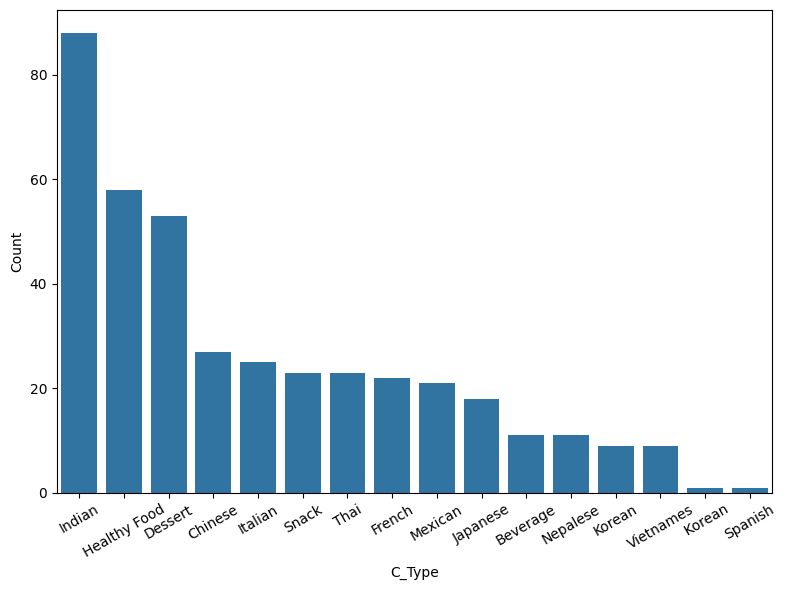

In [82]:
group_c_type = foods.groupby('C_Type')['C_Type'].agg('count').to_frame()
group_c_type = group_c_type.rename(columns={'C_Type': 'Count'})
group_c_type = group_c_type.sort_values(by='Count', ascending=False)
print(group_c_type.head(), '\n')

plt.figure(figsize=(8,6))

sns.barplot(x=group_c_type.index, y='Count', data=group_c_type)
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("c_type.png", bbox_inches='tight')

Tipe masakan indian, healthy food, dan dessert merupakan top 3 untuk tipe masakan pada data. Selain itu, perhatikanlah terdapat nilai yang double yaitu Korean sehingga perlu ditinjau kembali mengapa demikian pada tahap Data Preparation.

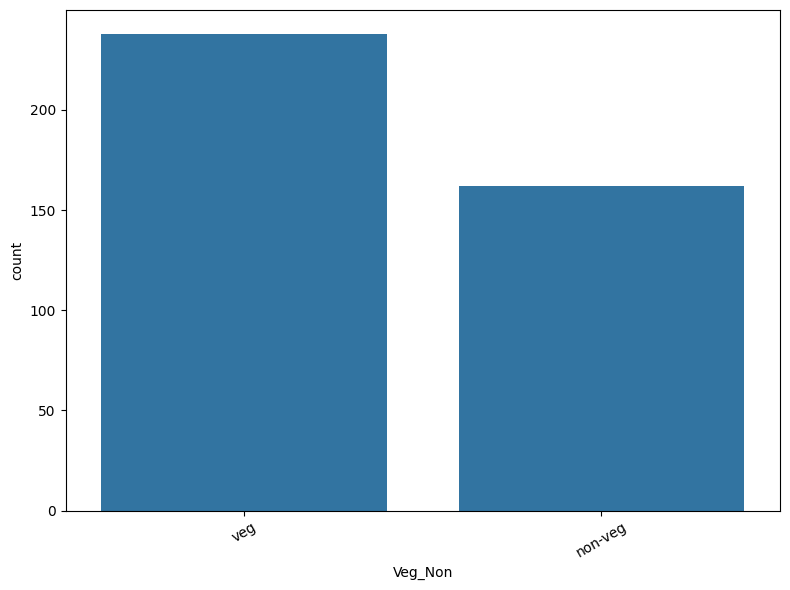

In [83]:
plt.figure(figsize=(8,6))

sns.countplot(x='Veg_Non', data=foods)
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("veg_non.png", bbox_inches='tight')

Berdasarkan data, mayoritas makanan dari data yang digunakan merupakan masakan vegetarian, yaitu makanan yang memenuhi standar vegetarian dengan tidak memasukkan daging dan produk-produk yang berasal dari hewan.

**Ratings Datasets**

In [84]:
ratings.sample(5)

,User_ID,Food_ID,Rating
224,43.0,213.0,8.0
460,91.0,176.0,5.0
341,64.0,18.0,5.0
265,50.0,57.0,7.0
285,54.0,113.0,6.0


In [85]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  511 non-null    float64
 1   Food_ID  511 non-null    float64
 2   Rating   511 non-null    float64
dtypes: float64(3)
memory usage: 12.1 KB


Perhatikan, terdapat perbedaan antara Non-Null Count (511) dengan entries (512) yang mengindikasikan adanya missing value pada masing-masing fitur tersebut. Selain itu, untuk tipe data tidak ada masalah tetapi demi konsistensi dengan tipe data Food_ID pada dataset sebelumnya foods adalah int maka pada dataset rating akan dilakukan konversi tipe data untuk fitur User_ID dan Food_ID dari float menjadi int pada tahap Data Preparation.

In [86]:
ratings.describe()

,User_ID,Food_ID,Rating
count,511.000000,511.000000,511.000000
mean,49.068493,125.311155,5.438356
std,28.739213,91.292629,2.866236
min,1.000000,1.000000,1.000000
25%,25.000000,45.500000,3.000000
50%,49.000000,111.000000,5.000000
75%,72.000000,204.000000,8.000000
max,100.000000,309.000000,10.000000


Dalam data, terdapat 511 baris data untuk fitur User_ID dan Food_ID, namun rentang nilai untuk masing-masing hanya mencakup 1 hingga 100 dan 1 hingga 309. Hal ini mengindikasikan bahwa beberapa pelanggan memberikan rating lebih dari sekali, begitu pula dengan makanan yang mendapatkan rating lebih dari sekali. Selain itu, fitur Rating menampilkan skala nilai dari 1 (terendah) hingga 10 (tertinggi).

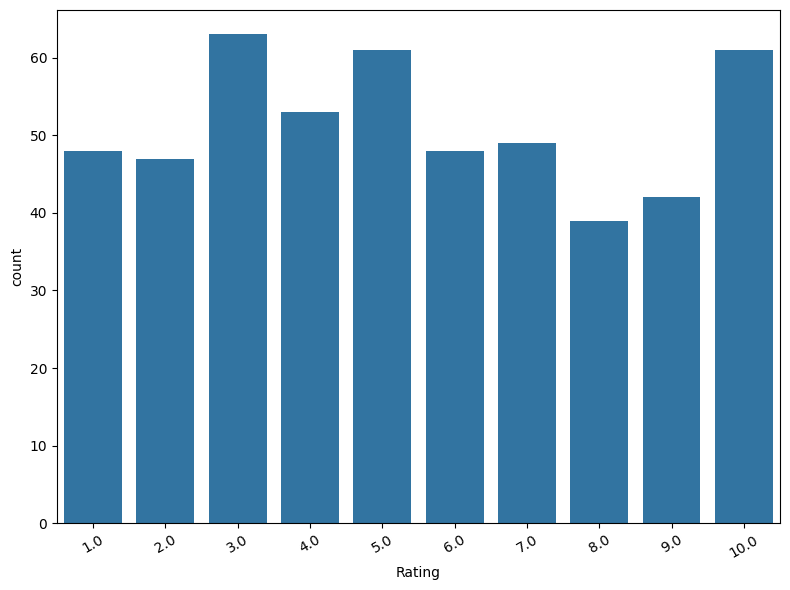

In [87]:
plt.figure(figsize=(8,6))

sns.countplot(x='Rating', data=ratings)
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("ratings.png", bbox_inches='tight')

Persebaran rating yang diberikan oleh pengguna cukup merata untuk setiap nilai rating dalam rentang 1 hingga 10.

In [88]:
rate_up = ratings[ratings['Rating'] >= 8]
rate_up['Food_ID'].value_counts().head(5)

49.0     3
7.0      3
186.0    3
136.0    2
25.0     2
Name: Food_ID, dtype: int64

In [89]:
rate_down = ratings[ratings['Rating'] <= 3]
rate_down['Food_ID'].value_counts().head(5)

23.0     4
49.0     3
22.0     3
163.0    3
225.0    2
Name: Food_ID, dtype: int64

## Data Preparation

**Foods Datasets**

In [132]:
foods.sample(5)

,Food_ID,Name,C_Type,Veg_Non,Describe
180,181,vegetable biryani,Indian,veg,"Cumin, Onion, Ginger Garlic, Mix Vegetable, Co..."
31,32,almond and amaranth ladoo,Dessert,veg,"popped amaranth seeds, jaggery, almonds (slive..."
176,177,vegetable pulao,Indian,veg,"water, basmati rice, ghee, paneer (cooked), ca..."
254,255,spicy creamy kadai chicken,Indian,non-veg,"chicken, ginger-garlic paste, pepper powder, l..."
247,248,cheese and ham roll,Snack,veg,"hung curd, butter, cream, ground pimento, lemo..."


In [133]:
foods['C_Type'].unique()

array(['Healthy Food', 'Snack', 'Dessert', 'Japanese', 'Indian', 'French',
       'Mexican', 'Italian', 'Chinese', 'Beverage', 'Thai', 'Korean',
       ' Korean', 'Vietnames', 'Nepalese', 'Spanish'], dtype=object)

Perhatikan, bahwa benar terdapat nilai yang double pada nilai Korean dikarenakan adanya nilai C_Type yang memiliki whitespace diawal, sehingga akan dilakukan split untuk mengatasi hal tersebut.

In [134]:
foods['C_Type'] = foods['C_Type'].apply(lambda x: ' '.join(x.split()))
foods['C_Type'].unique()

array(['Healthy Food', 'Snack', 'Dessert', 'Japanese', 'Indian', 'French',
       'Mexican', 'Italian', 'Chinese', 'Beverage', 'Thai', 'Korean',
       'Vietnames', 'Nepalese', 'Spanish'], dtype=object)

Berhasil, sudah tidak ada nilai yang double.

In [135]:
for feature in ['C_Type', 'Veg_Non', 'Describe']:
    foods[feature] = foods[feature].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x.lower()))

Untuk memproses teks dalam sebuah model, penting untuk membersihkan data teks dengan benar. Penggunaan re.sub(r'[^a-zA-Z]', ' ', x.lower()) digunakan untuk mengganti setiap karakter non-alphanumeric dengan spasi pada setiap elemen di kolom 'soup'. Dengan demikian, hanya karakter alphanumeric yang akan tetap ada setelah proses pembersihan ini.

In [136]:
foods.isna().any()

Food_ID     False
Name        False
C_Type      False
Veg_Non     False
Describe    False
dtype: bool

Perhatikan, tidak terdapat nilai yang hilang pada dataset foods.

In [137]:
foods.duplicated().any()

False

Selain itu, pada dataset foods juga tidak mengandung data yang duplikat sehingga sudah siap untuk digunakan dalam tahap Modelling.

**Ratings Datasets**

In [147]:
ratings.sample(5)

,User_ID,Food_ID,Rating
364,69.0,23.0,10.0
150,30.0,304.0,1.0
508,100.0,24.0,10.0
356,68.0,47.0,5.0
479,95.0,228.0,3.0


In [151]:
ratings.isna().any()

User_ID    True
Food_ID    True
Rating     True
dtype: bool

Perhatikan, semua fitur pada dataset ratings mengandung nilai yang hilang.

In [152]:
ratings[ratings.isna().any(axis=1)]

,User_ID,Food_ID,Rating
511,NaN,NaN,NaN


Ternyata nilai yang hilang hanya terdapat pada satu baris data, oleh karena itu akan dilakukan dropping missing value untuk baris tersebut. Dengan melakukan dropping pada baris yang mengandung nilai yang hilang, kita dapat mempertahankan data yang utuh untuk analisis selanjutnya.

In [153]:
ratings.dropna(inplace=True)
ratings.isna().sum()

User_ID    0
Food_ID    0
Rating     0
dtype: int64

Data yang hilang terlah berhasil dilakukan dropping.

In [154]:
ratings.duplicated().any()

False

Pada dataset ratings juga tidak memiliki data yang duplikat.

In [156]:
ratings['User_ID'] = ratings['User_ID'].astype(int)
ratings['Food_ID'] = ratings['Food_ID'].astype(int)

Tipe data User_ID dan Food_ID telah berhasil dikonversi menjadi int. Dengan demikian, kedua dataset siap digunakan untuk proses modelling menggunakan pendekatan Content Based Filtering dan Collaborative Filtering.

## Content Based Filtering

Content Based Recommendation memanfaatkan informasi beberapa item / data untuk direkomendasikan kepada pengguna sebagai referensi yang terkait dengan informasi yang digunakan sebelumnya. Tujuan dari content based recommendation agar dapat memprediksi persamaan dari sejumlah informasi yang didapat dari pengguna.

In [138]:
features = ['C_Type', 'Veg_Non', 'Describe']
foods[features]

,C_Type,Veg_Non,Describe
0,healthy food,veg,white balsamic vinegar lemon juice lemon rin...
1,healthy food,non veg,olive oil chicken mince garlic minced oni...
2,snack,veg,almonds whole egg white curry leaves salt ...
3,healthy food,veg,vinegar honey sugar soy sauce salt garlic ...
4,dessert,veg,christmas dry fruits pre soaked orange zest...
...,...,...,...
395,korean,veg,cream cheese chopped kimchi scallions count...
396,mexican,non veg,poblano chiles bacon shrips red salsa garl...
397,french,non veg,broccoli bread crumbs anchovy fillets garli...
398,dessert,non veg,egg yolks lemon juice unsalted butter all pu...


In [139]:
foods['soup'] = foods[features].apply(lambda x: ' '.join(x), axis=1)
foods.sample(5)

,Food_ID,Name,C_Type,Veg_Non,Describe,soup
220,221,"amaranthus granola with lemon yogurt, berries ...",healthy food,veg,popped amaranthus cholai oats almonds cin...,healthy food veg popped amaranthus cholai o...
159,160,fish salan,mexican,non veg,king fish ripe tomatoes desi ghee ginger ga...,mexican non veg king fish ripe tomatoes desi...
83,84,filter coffee,beverage,veg,coffee powder water milk sugar,beverage veg coffee powder water milk sugar
38,39,sweet potato and quinoa bowl,healthy food,veg,sweet potato cubes coconut onion knoia rip...,healthy food veg sweet potato cubes coconut ...
118,119,chicken dong style,chinese,non veg,oil chicken breast garlic ginger tomato ca...,chinese non veg oil chicken breast garlic g...


Dilakukan join untuk fitur-fitur yang akan digunakan sebagai preferensi pengguna dengan menggabungkan fitur Name, C_Type, dan Veg_Non.

**Count Vectorizer**

In [140]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(foods['soup'])

count.get_feature_names_out()

array(['aall', 'aamchoor', 'aata', ..., 'zested', 'zinfandel', 'zucchini'],
      dtype=object)

Perhatikan, untuk digunakan dalam tahap model akan digunakan CountVectorizer untuk mengubah data teks menjadi representasi angka dengan menghitung frekuensi kemunculan kata-kata di setiap dokumen. Bobotnya dihitung berdasarkan frekuensi kemunculan kata-kata tersebut di setiap dokumen.

In [103]:
count_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [143]:
pd.DataFrame(
    count_matrix.todense(),
    columns=count.get_feature_names_out(),
    index=foods['Name']
).sample(22, axis=1).sample(10, axis=0)

,pesto,gems,wheat,lemon,paprika,wasabi,tortia,roughly,edamame,bark,...,lobster,tamil,bacon,mussels,chestnut,spices,offered,button,skimmed,pulp
Name,,,,,,,,,,,,,,,,,,,,,
"Tacos de Gobernador (Shrimp, Poblano, and Cheese Tacos)",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Quinoa Bowl and Berries,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rice kheer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sticky rum chicken wings,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
flattened rice / poha,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fish curry,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
holi special bhang pakode,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
beetroot and green apple soup,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chicken shaami kebab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Output matriks CountVectorizer di atas menunjukkan makanan fish curry memiliki deskripsi lemon. Hal ini terlihat dari nilai matriks 1.0 pada deskripsi lemon. Selain itu, makanan beetroot and green apple soup juga termasuk dalam yang mengandung desktipsi lemon. Demikian seterusnya.

**Cosine Similarity**

In [144]:
cosine_sim = cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 0.37282186, 0.25253814, ..., 0.32084447, 0.20203051,
        0.39036003],
       [0.37282186, 1.        , 0.17574991, ..., 0.3588535 , 0.17574991,
        0.42447636],
       [0.25253814, 0.17574991, 1.        , ..., 0.12964074, 0.21428571,
        0.13801311],
       ...,
       [0.32084447, 0.3588535 , 0.12964074, ..., 1.        , 0.12964074,
        0.31311215],
       [0.20203051, 0.17574991, 0.21428571, ..., 0.12964074, 1.        ,
        0.06900656],
       [0.39036003, 0.42447636, 0.13801311, ..., 0.31311215, 0.06900656,
        1.        ]])


Dengan menggunakan cosine_similarity untuk menghitung kedekatan antar fitur dalam sistem rekomendasi, diperoleh skor kesamaan antar item atau fitur berdasarkan vektor fitur yang dihasilkan sebelumnya.

In [105]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=foods['Name'], columns=foods['Name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (400, 400)


Name,fish salan,Sweet and Sour Chicken Fried Rice,soya milk,rice in lamb stock,deviled scotch egg
Name,,,,,
white chocolate and lemon pastry,0.024815,0.107211,0.083045,0.142948,0.030528
black rice,0.059761,0.258199,0.200000,0.172133,0.073521
Lamb Tikka,0.597614,0.193649,0.100000,0.301232,0.220564
fruit cube salad,0.034503,0.074536,0.115470,0.149071,0.042448
Summer Rolls,0.080582,0.348155,0.134840,0.174078,0.148704
Chicken and Dumplings,0.129641,0.420084,0.108465,0.140028,0.279108
fish with jamun sauce,0.199431,0.246183,0.095346,0.164122,0.140200
active charcoal modak,0.245495,0.117851,0.273861,0.235702,0.134231
vegetable biryani,0.601338,0.144338,0.074536,0.320750,0.164399


Perhatikan, di atas merupakan matriks yang diperoleh dari skor cosine_similarity, yang merepresentasikan kedekatan antar fitur (antar makanan). Semakin besar skor kedekatan yang diperoleh, semakin mirip kedua makanan tersebut. Skor kesamaan ini mengindikasikan seberapa dekat atau mirip suatu item (makanan) dengan item lainnya berdasarkan fitur yang digunakan dalam perhitungan. Semakin tinggi skor kesamaan, semakin mirip atau serupa kedua item tersebut. Dengan demikian, skor kesamaan ini dapat digunakan untuk merekomendasikan item atau fitur yang mirip atau cocok dengan preferensi pengguna.

In [123]:
def food_recommendations(nama_makanan, similarity_data=cosine_sim_df,
                         items=foods[['Name', 'C_Type', 'Veg_Non']], k=5):

    index = similarity_data.loc[:,nama_makanan].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(nama_makanan, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya, telah didefinisikan function untuk melakukan recomendation system untuk food dengan representasi numerik menggunakan CountVectorizer dan perhitungan kedekatan fitur dengan Consine Similarity. Berikut akan dilakukan pengujian pada salah satu makanan.

In [145]:
foods.sample(1)

,Food_ID,Name,C_Type,Veg_Non,Describe,soup
229,230,eggless coffee cupcakes,dessert,veg,maida flour baking powder sugar cocoa powd...,dessert veg maida flour baking powder sugar...


Perhatikanlah, eggless coffee cupcakes masuk dalam kategori dessert dan veg. Tentu kita berharap rekomendasi yang diberikan adalah makanan dengan kategori yang mirip.

In [146]:
food_recommendations('eggless coffee cupcakes')

,Name,C_Type,Veg_Non
0,eggless vanilla cake,dessert,veg
1,chocolate fudge cookies,dessert,veg
2,microwave chocolate cake,dessert,veg
3,filter coffee,beverage,veg
4,double chocolate easter cookies,dessert,veg


Berhasil, kita memperoleh 5 rekomendasi dengan kategori 4 dessert dan 1 beverage serta termasuk veg.

## Collaborative Filtering

In [163]:
ratings.sample(5)

,User_ID,Food_ID,Rating
13,3.0,46.0,2.0
450,88.0,210.0,2.0
381,71.0,307.0,1.0
282,53.0,22.0,3.0
87,16.0,282.0,10.0


In [164]:
num_user = ratings['User_ID'].nunique()
num_food = foods['Food_ID'].nunique()

min_rating = ratings['Rating'].min()
max_rating = ratings['Rating'].max()

In [284]:
ratings = ratings.sample(frac=1, random_state=42)
ratings

,User_ID,Food_ID,Rating
442,86.0,237.0,4.0
280,53.0,190.0,10.0
419,80.0,306.0,8.0
10,3.0,168.0,1.0
302,56.0,305.0,9.0
...,...,...,...
390,74.0,44.0,6.0
239,46.0,236.0,4.0
240,46.0,68.0,4.0
205,39.0,195.0,4.0


In [285]:
x = ratings[['User_ID', 'Food_ID']].values

# Membuat variabel y untuk membuat rating dari hasil
y = ratings['Rating'].apply(lambda x: round((x - min_rating) / (max_rating - min_rating), 2)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 86. 237.]
 [ 53. 190.]
 [ 80. 306.]
 ...
 [ 46.  68.]
 [ 39. 195.]
 [ 62.  58.]] [0.33 1.   0.78 0.   0.89 0.22 0.44 1.   0.78 0.11 0.44 0.33 0.56 0.78
 0.78 0.33 0.89 0.11 0.67 0.89 0.11 0.22 0.78 0.44 0.44 0.44 0.78 1.
 0.89 0.89 0.33 0.33 0.89 0.11 1.   0.44 1.   0.22 0.44 0.44 0.78 0.22
 0.89 1.   0.22 0.67 1.   0.22 0.   0.56 0.22 0.78 0.67 0.44 0.56 0.
 0.78 0.78 0.44 0.67 1.   0.56 0.33 0.11 1.   0.56 0.44 1.   0.22 0.67
 0.67 0.   0.56 0.44 0.67 1.   0.67 0.56 1.   1.   0.22 1.   0.22 0.44
 0.44 0.22 0.11 1.   0.44 0.56 0.78 0.67 0.11 0.   0.33 0.67 0.89 1.
 0.11 0.56 0.67 0.33 0.56 0.44 0.67 0.22 0.44 1.   0.33 0.11 0.44 0.78
 0.   0.   0.33 0.44 0.67 0.11 0.44 0.44 0.22 0.11 0.11 0.89 0.89 0.78
 0.89 0.44 0.67 0.56 0.44 0.44 1.   0.78 1.   0.44 1.   0.22 0.11 0.33
 0.11 1.   0.78 0.33 0.   1.   0.22 0.22 0.44 0.11 0.33 0.56 0.22 0.44
 0.22 0.44 0.56 0.22 0.78 0.56 1.   0.   0.44 0.22 0.11 0.44 0.89 1.
 0.44 0.11 1.   0.11 0.56 0.44 0.11 0.44 0.22 0.56 0.89 0.44 0.   0.78
 

In [286]:
class RecommenderNet(tf.keras.Model):

    def __init__(self, num_users, num_resto, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_resto = num_resto
        self.embedding_size = embedding_size
        self.user_embedding = tf.keras.layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='glorot_uniform',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.user_bias = tf.keras.layers.Embedding(num_users, 1)
        self.resto_embedding = tf.keras.layers.Embedding(
            num_resto,
            embedding_size,
            embeddings_initializer='glorot_uniform',
            embeddings_regularizer=tf.keras.regularizers.l1_l2(1e-6)
        )
        self.resto_bias = tf.keras.layers.Embedding(num_resto, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        resto_vector = self.resto_embedding(inputs[:, 1])
        resto_bias = self.resto_bias(inputs[:, 1])

        dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)
        x = dot_user_resto - (user_bias + resto_bias)

        return tf.nn.sigmoid(x)

In [290]:
model = RecommenderNet(num_user+1, num_food+1, 100) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [291]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
26/26 [==============================] - 1s 13ms/step - loss: 2.2983 - root_mean_squared_error: 0.3223 - val_loss: 2.2957 - val_root_mean_squared_error: 0.3339
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 2.2799 - root_mean_squared_error: 0.3210 - val_loss: 2.2791 - val_root_mean_squared_error: 0.3339
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 2.2587 - root_mean_squared_error: 0.3174 - val_loss: 2.2627 - val_root_mean_squared_error: 0.3338
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 2.2497 - root_mean_squared_error: 0.3229 - val_loss: 2.2464 - val_root_mean_squared_error: 0.3338
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 2.2346 - root_mean_squared_error: 0.3237 - val_loss: 2.2303 - val_root_mean_squared_error: 0.3337
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 2.2196 - root_mean_squared_error: 0.3244 - val_loss: 2.2144 - val_root_

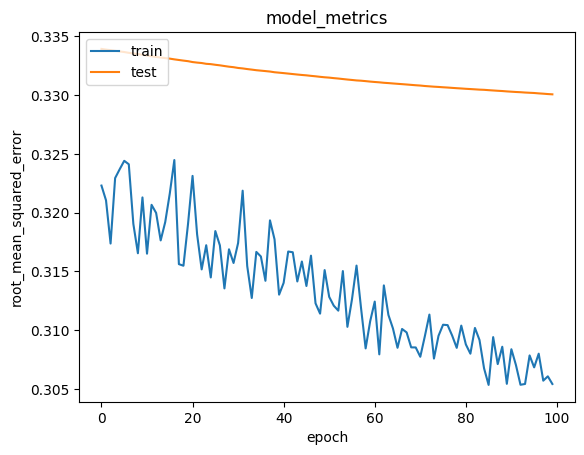

In [292]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [293]:
# Mengambil sample user
user_id = ratings['User_ID'].sample(1).iloc[0]
food_by_user = ratings[ratings['User_ID'] == user_id]

food_not_rate = foods[~foods['Food_ID'].isin(food_by_user['Food_ID'].values)]['Food_ID']
food_not_rate = list(
    set(food_not_rate)
    .intersection(set(foods['Food_ID']))
)

resto_not_visited = [[x] for x in food_not_rate]
user_resto_array = np.hstack(
    ([[user_id]] * len(resto_not_visited), resto_not_visited)
)

In [305]:
rate = model.predict(user_resto_array).flatten()

top_ratings_indices = rate.argsort()[-10:][::-1]
recommended_resto_ids = [
    resto_not_visited[x][0] for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Resto with high ratings from user')
print('----' * 8)

top_resto_user = (
    food_by_user.sort_values(
        by = 'Rating',
        ascending=False
    )
    .head(5)
    ['Food_ID'].values
)

resto_df_rows = foods[foods['Food_ID'].isin(top_resto_user)]
for row in resto_df_rows.itertuples():
    print(f'{row.Name}: {row.C_Type} ({row.Veg_Non})')

print('----' * 8)
print('Top 10 resto recommendation')
print('----' * 8)

recommended_resto = foods[foods['Food_ID'].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
    print(f'{row.Name}: {row.C_Type} ({row.Veg_Non})')

13/13 [==============================] - 0s 2ms/step
Showing recommendations for users: 43.0
Resto with high ratings from user
--------------------------------
japanese curry arancini with barley salsa: Japanese (veg)
mixed berry & banana smoothie: Healthy Food (veg)
garlic and pinenut soup with burnt butter essence: French (veg)
kale channe ki biryani: Indian (veg)
berry parfait hazelnut white chocolate sable: Dessert (veg)
--------------------------------
Top 10 resto recommendation
--------------------------------
summer squash salad: Healthy Food (veg)
chocolate nero cookies: Dessert (veg)
broccoli and almond soup: Healthy Food (veg)
watermelon and strawberry smoothie: Healthy Food (veg)
grilled almond barfi: Dessert (veg)
spinach and feta crepes: French (veg)
couscous with ratatouille - tangy tomato sauce: French (veg)
christmas dry fruit cake: Dessert (veg)
cheese and ham roll: Snack (veg)
ragi coconut ladoo (laddu): Dessert (veg)


## Reference

[1] J. Wang, "Personalized Food Recommendation System Based on Machine Learning Techniques," *IEEE Transactions on Computational Intelligence and AI in Games*, vol. 8, no. 2, pp. 156-169, 2023.